# CLASIFICACION CON SVM Y NN

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### CARGA DEL DATASET

In [2]:
data = pd.read_csv('data.csv')
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.803  0.6240    7    -6.764     0       0.0477        0.4510   
1           0.762  0.7030   10    -7.951     0       0.3060        0.2060   
2           0.261  0.0149    1   -27.528     1       0.0419        0.9920   
3           0.722  0.7360    3    -6.994     0       0.0585        0.4310   
4           0.787  0.5720    1    -7.516     1       0.2220        0.1450   
..            ...     ...  ...       ...   ...          ...           ...   
190         0.166  0.0551    9   -19.494     0       0.0520        0.9760   
191         0.862  0.6240    3   -11.630     1       0.0565        0.0192   
192         0.499  0.3510    9   -11.509     0       0.0448        0.9510   
193         0.574  0.7290   10    -5.838     0       0.0965        0.0406   
194         0.747  0.6660   11    -7.845     1       0.1970        0.1300   

     instrumentalness  liveness  valence    tempo  duration_ms  \
0            0.000734    0.1000   0.6280   95.968       304524   
1            0.000000    0.0912   0.5190  151.329       247178   
2            0.897000    0.1020   0.0382   75.296       286987   
3            0.000001    0.1230   0.5820   89.860       208920   
4            0.000000    0.0753   0.6470  155.117       179413   
..                ...       ...      ...      ...          ...   
190          0.635000    0.1190   0.1430  176.616       206520   
191          0.000153    0.0465   0.8820  124.896       254240   
192          0.000099    0.1180   0.6160   90.664       235947   
193          0.000004    0.1940   0.4130  110.547       190239   
194          0.000000    0.3600   0.5310   77.507       177213   

     time_signature  liked  
0                 4      0  
1                 4      1  
2                 4      0  
3                 4      1  
4                 4      1  
..              ...    ...  
190               3      0  
191               4      0  
192               4      0  
193               5      1  
194               4      1  

[195 rows x 14 columns]

In [3]:
#Tamaño del dataset
data.shape

(195, 14)

In [4]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


### ANÁLISIS DESCRIPTIVO DE DATOS

In [5]:
#Resumen estadístico de las variables
data.describe()

danceability      energy         key    loudness        mode  \
count    195.000000  195.000000  195.000000  195.000000  195.000000   
mean       0.636656    0.638431    5.497436   -9.481631    0.538462   
std        0.216614    0.260096    3.415209    6.525086    0.499802   
min        0.130000    0.002400    0.000000  -42.261000    0.000000   
25%        0.462500    0.533500    2.000000   -9.962000    0.000000   
50%        0.705000    0.659000    6.000000   -7.766000    1.000000   
75%        0.799000    0.837500    8.000000   -5.829000    1.000000   
max        0.946000    0.996000   11.000000   -2.336000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   195.000000    195.000000        195.000000  195.000000  195.000000   
mean      0.148957      0.319093          0.192337    0.148455    0.493632   
std       0.120414      0.320782          0.346226    0.105975    0.267695   
min       0.027800      0.000003          0.000000    0.033100    0.035300   
25%       0.056800      0.042200          0.000000    0.084000    0.269000   
50%       0.096200      0.213000          0.000008    0.105000    0.525000   
75%       0.230500      0.504000          0.097500    0.177000    0.717500   
max       0.540000      0.995000          0.969000    0.633000    0.980000   

            tempo    duration_ms  time_signature       liked  
count  195.000000     195.000000      195.000000  195.000000  
mean   121.086174  213408.933333        3.912821    0.512821  
std     28.084829   72152.392864        0.451332    0.501122  
min     60.171000   77203.000000        1.000000    0.000000  
25%    100.242000  178300.500000        4.000000    0.000000  
50%    124.896000  204000.000000        4.000000    1.000000  
75%    142.460500  242373.500000        4.000000    1.000000  
max    180.036000  655213.000000        5.000000    1.000000

<Figure size 1800x1800 with 0 Axes>

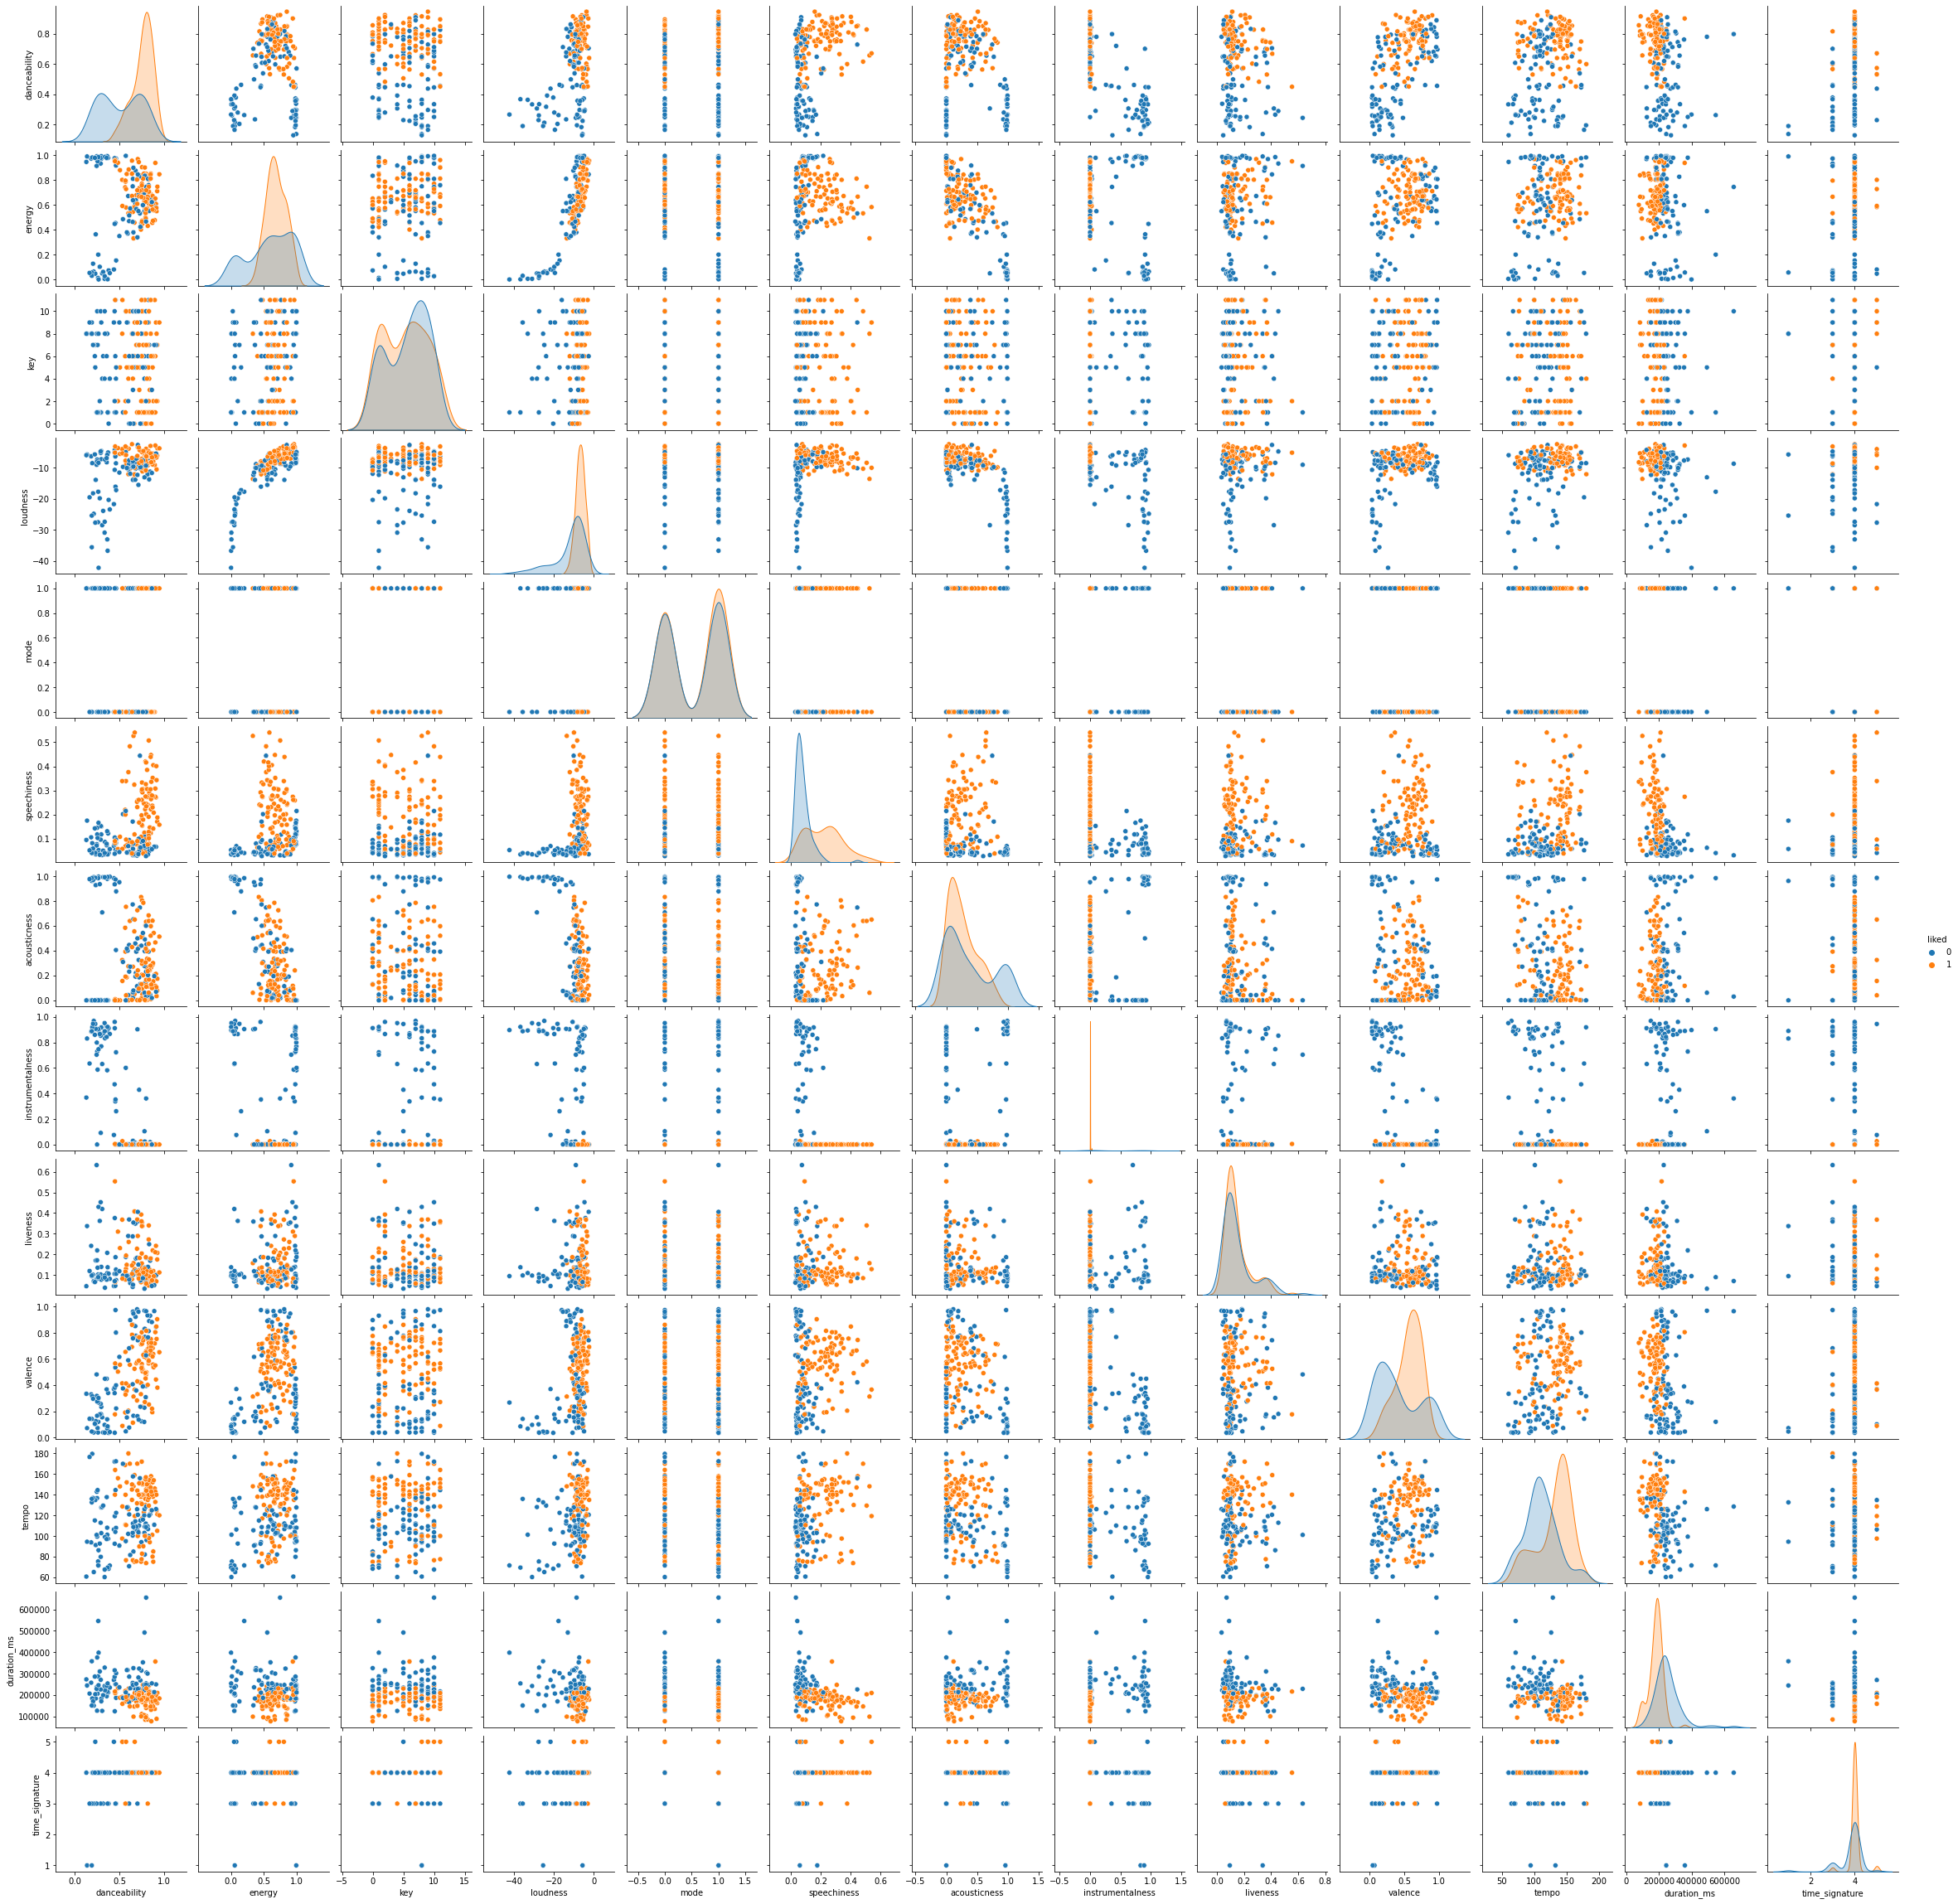

In [8]:
#Gráfica de relaciones por pares de las variables
#para realizar un análisis exploratorio visual de las variables
plt.figure(figsize=(25,25))
sns.pairplot(data,hue='liked') #Para mapear de diferentes colores

In [11]:
#Correlación lineal entre variables
corr = data.corr()
corr

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.137188 -0.063906  0.455078  0.043759   
energy                0.137188  1.000000  0.130251  0.813567 -0.068308   
key                  -0.063906  0.130251  1.000000  0.046865 -0.103371   
loudness              0.455078  0.813567  0.046865  1.000000 -0.041678   
mode                  0.043759 -0.068308 -0.103371 -0.041678  1.000000   
speechiness           0.388596  0.122825 -0.093395  0.279710  0.031953   
acousticness         -0.234176 -0.772583 -0.066844 -0.664989 -0.025709   
instrumentalness     -0.807053 -0.241444  0.003597 -0.538266  0.075442   
liveness             -0.137069  0.166508 -0.039622  0.078093 -0.048661   
valence               0.612344  0.319409  0.033336  0.363532  0.033409   
tempo                 0.223522  0.214905  0.097240  0.274462 -0.036270   
duration_ms          -0.232621 -0.134527  0.054522 -0.206334 -0.060965   
time_signature        0.317096  0.123942  0.048344  0.207806 -0.110739   
liked                 0.569425  0.176179 -0.044406  0.410774  0.023747   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.388596     -0.234176         -0.807053 -0.137069   
energy               0.122825     -0.772583         -0.241444  0.166508   
key                 -0.093395     -0.066844          0.003597 -0.039622   
loudness             0.279710     -0.664989         -0.538266  0.078093   
mode                 0.031953     -0.025709          0.075442 -0.048661   
speechiness          1.000000     -0.079710         -0.343242 -0.006665   
acousticness        -0.079710      1.000000          0.294320 -0.140988   
instrumentalness    -0.343242      0.294320          1.000000  0.055730   
liveness            -0.006665     -0.140988          0.055730  1.000000   
valence              0.180708     -0.313806         -0.572224 -0.013004   
tempo                0.313918     -0.255097         -0.299493 -0.010555   
duration_ms         -0.388397      0.138793          0.249683 -0.143966   
time_signature       0.140325     -0.142177         -0.375199 -0.135409   
liked                0.591505     -0.179375         -0.569440 -0.009797   

                   valence     tempo  duration_ms  time_signature     liked  
danceability      0.612344  0.223522    -0.232621        0.317096  0.569425  
energy            0.319409  0.214905    -0.134527        0.123942  0.176179  
key               0.033336  0.097240     0.054522        0.048344 -0.044406  
loudness          0.363532  0.274462    -0.206334        0.207806  0.410774  
mode              0.033409 -0.036270    -0.060965       -0.110739  0.023747  
speechiness       0.180708  0.313918    -0.388397        0.140325  0.591505  
acousticness     -0.313806 -0.255097     0.138793       -0.142177 -0.179375  
instrumentalness -0.572224 -0.299493     0.249683       -0.375199 -0.569440  
liveness         -0.013004 -0.010555    -0.143966       -0.135409 -0.009797  
valence           1.000000  0.218017    -0.114842        0.201111  0.268653  
tempo             0.218017  1.000000    -0.256250        0.071754  0.371202  
duration_ms      -0.114842 -0.256250     1.000000       -0.039078 -0.490651  
time_signature    0.201111  0.071754    -0.039078        1.000000  0.221479  
liked             0.268653  0.371202    -0.490651        0.221479  1.000000

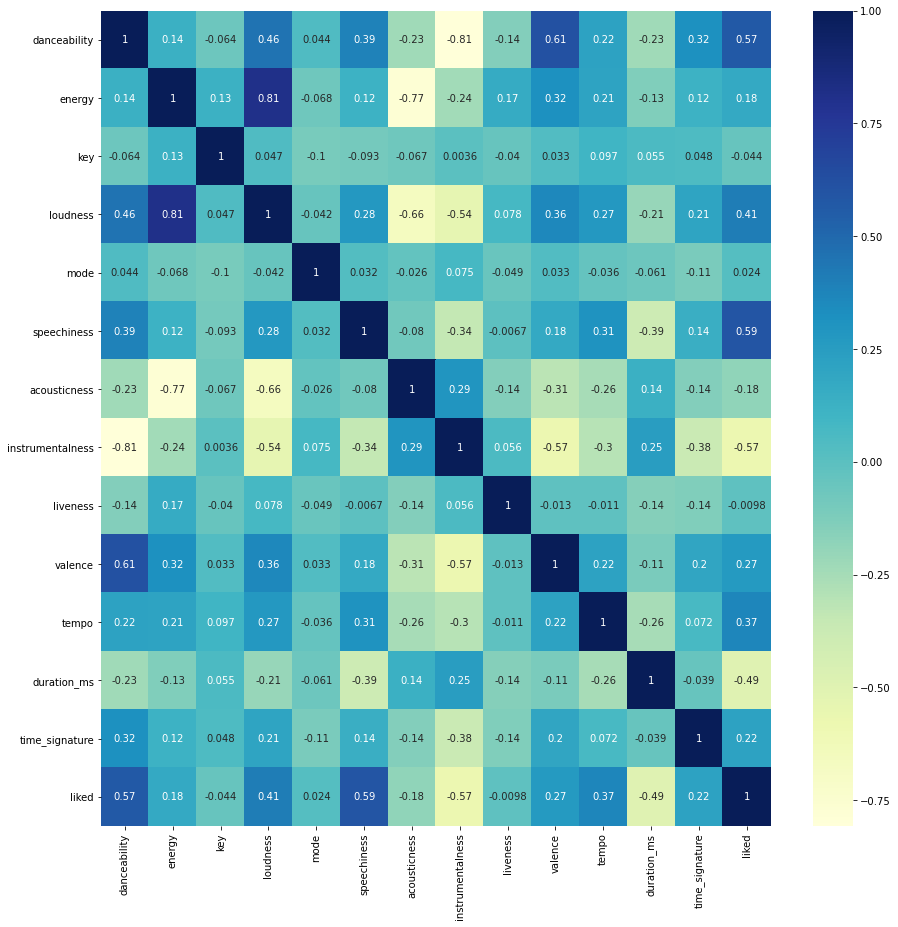

In [12]:
#Mapa de calor - Matriz de correlación. 
plt.figure(figsize=(15,15))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
#Mostrar mapa de calor
plt.show()

<AxesSubplot:>

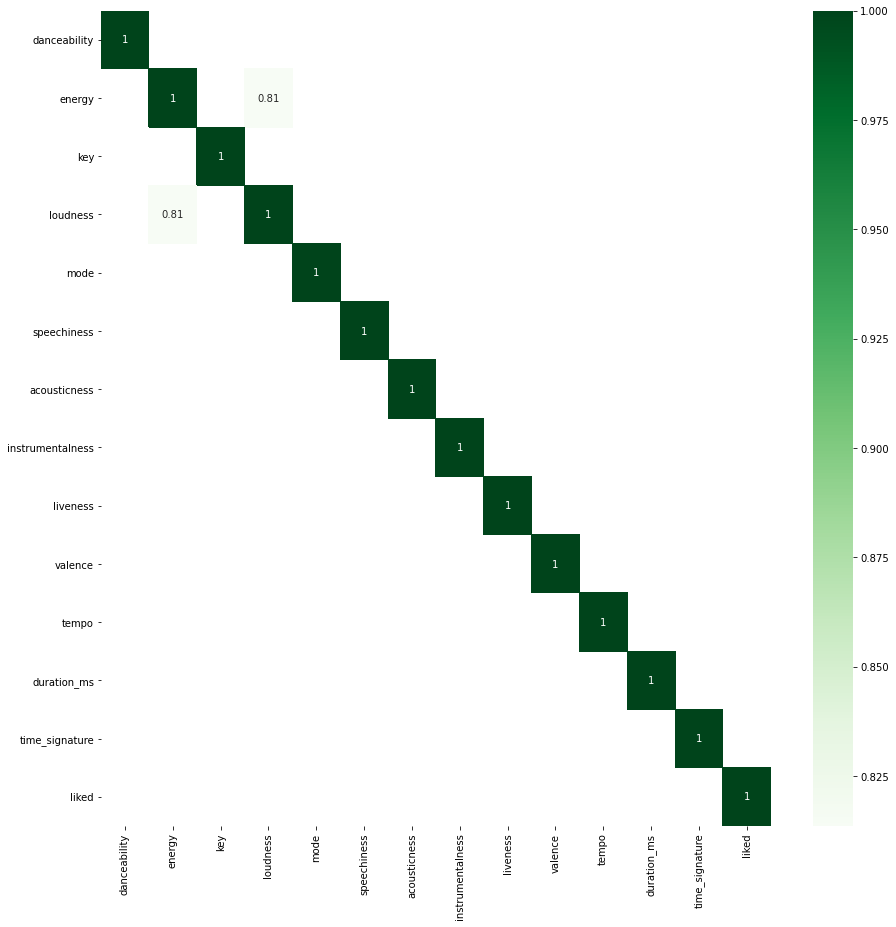

In [13]:
#Verificar qué variables tiene una correlación "fuerte positiva" >0.8
corrGreater = corr[corr>=0.8]
corrGreater
plt.figure(figsize=(15,15))
sns.heatmap(corrGreater, cmap="Greens", annot=True)

<AxesSubplot:>

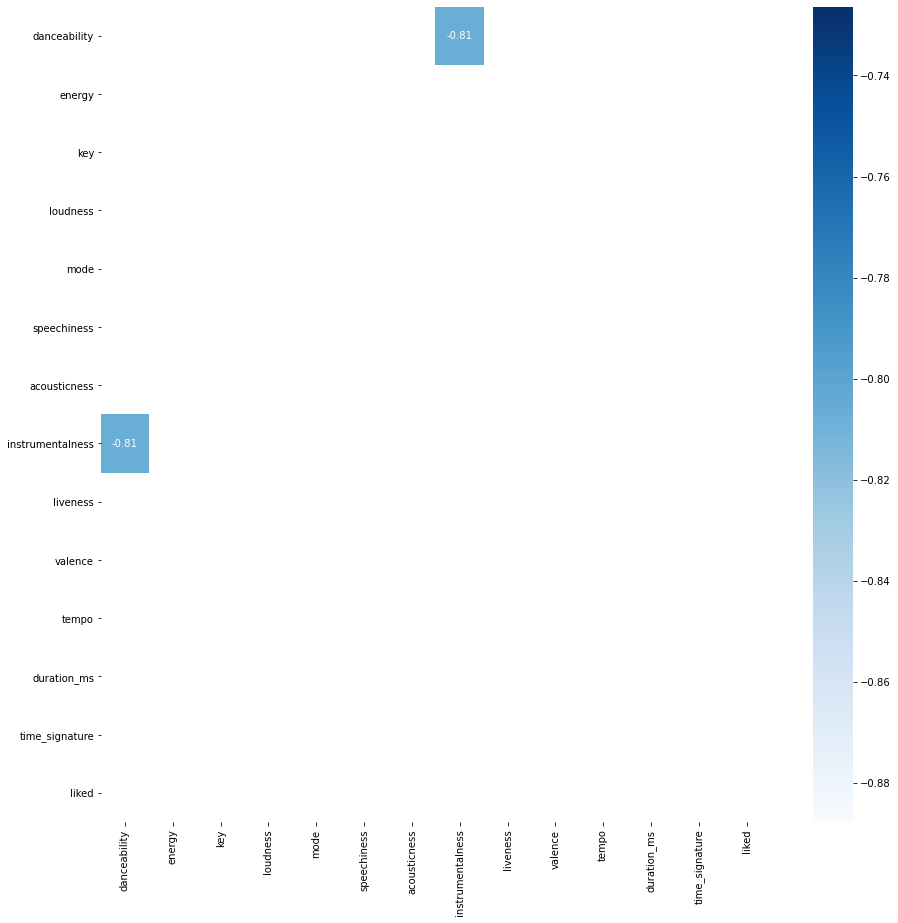

In [14]:
#Verificar qué variables tiene una correlación "fuerte negativa" <-0.8
corrLower = corr[corr<=(-0.8)] 
corrLower
plt.figure(figsize=(15,15))
sns.heatmap(corrLower, cmap="Blues", annot=True)

In [15]:
#Covarianza de las variables con correlaciones fuertes
#Covarianza de "energy"
cov=data.cov()
cov['energy'] 

danceability           0.007729
energy                 0.067650
key                    0.115700
loudness               1.380744
mode                  -0.008880
speechiness            0.003847
acousticness          -0.064460
instrumentalness      -0.021742
liveness               0.004590
valence                0.022239
tempo                  1.569827
duration_ms        -2524.612375
time_signature         0.014550
liked                  0.022963
Name: energy, dtype: float64

In [17]:
#Covarianza de "danceability"
cov=data.cov()
cov['danceability']

danceability           0.046922
energy                 0.007729
key                   -0.047277
loudness               0.643219
mode                   0.004738
speechiness            0.010136
acousticness          -0.016272
instrumentalness      -0.060527
liveness              -0.003146
valence                0.035508
tempo                  1.359809
duration_ms        -3635.678425
time_signature         0.031001
liked                  0.061811
Name: danceability, dtype: float64

### PREPROCESAMIENTO DE DATOS

In [21]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [25]:
#Verificar tamaño
data2.shape

(195, 14)

In [26]:
#Reescalando datos
#z = (x - u) / s
sc = StandardScaler()
data2[['key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'energy', 'danceability']] = sc.fit_transform(data2[['key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'energy', 'danceability']])

In [27]:
#Mostrar datos reescalados
data2.head(10)

danceability    energy       key  loudness      mode  speechiness  \
0      0.769903 -0.055628  0.441095  0.417562 -1.080123    -0.843078   
1      0.580139  0.248888  1.321780  0.235180 -1.080123     1.307549   
2     -1.738685 -2.403485 -1.320274 -2.772810  0.925820    -0.891369   
3      0.395003  0.376091 -0.733151  0.382222 -1.080123    -0.753156   
4      0.695849 -0.256069 -1.320274  0.302018  0.925820     0.608158   
5      0.654193 -0.024791  0.734657  0.471185  0.925820    -0.199472   
6      0.135814 -0.190540 -1.613836  0.165423 -1.080123     1.457419   
7      1.320682  0.283580  0.441095  0.531262  0.925820     0.183528   
8      0.728248  0.079284  0.441095  0.371621 -1.080123    -0.825593   
9      1.001323  0.113976 -0.733151  0.382069  0.925820     2.481527   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.412263         -0.554830 -0.458413  0.503237 -0.896670     1.266065   
1     -0.353462         -0.556955 -0.541666  0.095009  1.079610     0.469229   
2      2.103110          2.040507 -0.439492 -1.705687 -1.634621     1.022384   
3      0.349755         -0.556952 -0.240821  0.330957 -1.114714    -0.062375   
4     -0.544112         -0.556955 -0.692088  0.574396  1.214835    -0.472381   
5     -0.871030         -0.556955 -0.541666  1.248534  0.709136     0.147568   
6      0.737306         -0.556955 -0.325966  1.057528 -1.646115    -0.935926   
7     -0.753827         -0.556840  0.251126  1.536915 -0.575530    -0.717118   
8     -0.550363         -0.550469 -0.511392 -0.695230 -0.323681     0.473147   
9     -0.175314         -0.556955 -0.420571  0.941427  1.317574    -0.667609   

   time_signature  liked  
0        0.193658      0  
1        0.193658      1  
2        0.193658      0  
3        0.193658      1  
4        0.193658      1  
5        0.193658      1  
6        0.193658      1  
7        0.193658      1  
8        0.193658      0  
9        0.193658      1

In [28]:
data2.describe()

danceability        energy           key      loudness          mode  \
count  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02   
mean  -1.047595e-16  1.608400e-17 -2.732857e-17  7.116814e-18  2.732857e-17   
std    1.002574e+00  1.002574e+00  1.002574e+00  1.002574e+00  1.002574e+00   
min   -2.345004e+00 -2.451668e+00 -1.613836e+00 -5.036523e+00 -1.080123e+00   
25%   -8.060639e-01 -4.044724e-01 -1.026713e+00 -7.380833e-02 -1.080123e+00   
50%    3.163208e-01  7.928408e-02  1.475335e-01  2.636052e-01  9.258201e-01   
75%    7.513895e-01  7.673361e-01  7.346565e-01  5.612237e-01  9.258201e-01   
max    1.431763e+00  1.378296e+00  1.615341e+00  1.097920e+00  9.258201e-01   

        speechiness  acousticness  instrumentalness      liveness  \
count  1.950000e+02  1.950000e+02      1.950000e+02  1.950000e+02   
mean  -3.501473e-17 -4.554761e-18     -4.611696e-17  6.832142e-18   
std    1.002574e+00  1.002574e+00      1.002574e+00  1.002574e+00   
min   -1.008767e+00 -9.972870e-01     -5.569551e-01 -1.091322e+00   
25%   -7.673104e-01 -8.654043e-01     -5.569551e-01 -6.097813e-01   
50%   -4.392628e-01 -3.315843e-01     -5.569331e-01 -4.111104e-01   
75%    6.789301e-01  5.779098e-01     -2.746223e-01  2.700468e-01   
max    3.255853e+00  2.112486e+00      2.248999e+00  4.584043e+00   

            valence         tempo   duration_ms  time_signature       liked  
count  1.950000e+02  1.950000e+02  1.950000e+02    1.950000e+02  195.000000  
mean  -6.262797e-18 -1.138690e-17 -1.878839e-17   -9.251859e-18    0.512821  
std    1.002574e+00  1.002574e+00  1.002574e+00    1.002574e+00    0.501122  
min   -1.716549e+00 -2.174554e+00 -1.892613e+00   -6.470440e+00    0.000000  
25%   -8.412931e-01 -7.440967e-01 -4.878397e-01    1.936575e-01    0.000000  
50%    1.174805e-01  1.360034e-01 -1.307393e-01    1.936575e-01    1.000000  
75%    8.384333e-01  7.630220e-01  4.024693e-01    1.936575e-01    1.000000  
max    1.821551e+00  2.104395e+00  6.138969e+00    2.415023e+00    1.000000

### SVM

In [29]:
# Separación de los datos en train y test
X = data2.drop(columns = 'liked')
y = data2['liked']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [30]:
# Creación del modelo SVM lineal
modeloSVM = SVC(C = 1, kernel = 'linear', random_state=1234)
modeloSVM.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=1234)

In [31]:
# Predicciones test
predictSVM = modeloSVM.predict(X_test)
predictSVM

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [32]:
# Accuracy de test del modelo 
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predictSVM,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 89.74358974358975%


In [33]:
# Matriz de confusión de las predicciones de test
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predictSVM,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción   0   1
Real              
0           15   2
1            2  20

#### Tunear hiperparámetros

In [35]:
# Grid de hiperparámetros
param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')} #Devuelve números espaciados uniformemente

# Búsqueda por validación cruzada
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 5, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

param_C param_kernel  mean_test_score  std_test_score  mean_train_score  \
13  3.11206          rbf         0.910887        0.060570          0.977587   
5   1.10402          rbf         0.910887        0.057030          0.963161   
7   1.60603          rbf         0.910887        0.060570          0.969574   
2   0.60201       linear         0.910685        0.045920          0.932723   
9   2.10804          rbf         0.904637        0.071097          0.974374   

    std_train_score  
13         0.007815  
5          0.010806  
7          0.007791  
2          0.011850  
9          0.007807

In [36]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.1040201005025128, 'kernel': 'rbf'} : 0.9108870967741935 accuracy


In [37]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [38]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 94.87179487179486%


In [39]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción   0   1
Real              
0           16   1
1            1  21

In [40]:
#Reporte de clasificación
clas_report = classification_report(predicciones, y_test)
print('======== REPORTE DEL CLASIFICADOR CON SVM ========')
print(clas_report)

======== REPORTE DEL CLASIFICADOR CON SVM ========
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.95      0.95      0.95        22

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



### REDES NEURONALES

In [52]:
#Creación del modelo de NN con Multi layer Perceptron
classifier = MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=300,activation = 'relu',solver='sgd',random_state=1)

In [53]:
#Entrenamos

classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=300, random_state=1,
              solver='sgd')

In [54]:
#Predicción sobre las instancias de prueba
y_pred = classifier.predict(X_test)

In [55]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [56]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 84.61538461538461%


In [57]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    y_pred,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción   0   1
Real              
0           15   2
1            4  18

In [58]:
#Reporte de clasificación
clas_report = classification_report(y_pred, y_test)
print('========== REPORTE DEL CLASIFICADOR CON NN ==========')
print(clas_report)

========== REPORTE DEL CLASIFICADOR CON NN ==========
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.82      0.90      0.86        20

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.85        39
weighted avg       0.85      0.85      0.85        39

